## **About Fire Incidents**  
Test Classification Model: Stochastic Gradient D  Random Forest 191


Measure Model Performance: 

Import Libraries and Data Set

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as sm
import statsmodels
import sklearn.linear_model
from sklearn.linear_model import LinearRegression

import scipy, scipy.stats

import warnings
warnings.filterwarnings('ignore')



Google Authorization

In [0]:
#code to authorize access to Google Drive
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
worksheet = gc.open('loss_vs_residential').sheet1

rows = worksheet.get_all_values()



In [0]:
# Read contents of CSV file
df_rows = worksheet.get_all_values()

# Convert to a DataFrame and render.
import pandas as pd
cols = df_rows[0]
df  = pd.DataFrame.from_records(df_rows, columns = cols)

#drop the duplicate header row
df = df.reindex(df.index.drop(0))


#set target variable column name
target = df_rows[0][0]
#set column names of all features
features = df_rows[0][1:]

import numpy as np

# Prepare the data
X = np.c_[df[features]]
y = np.c_[df[target]]



X=X.astype(float)
y=y.astype(float)

In [0]:
pd.DataFrame.from_records(rows)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74
0,Loss_rank,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Number_of_responding_apparatus,Number_of_responding_personnel,TFS_Firefighter_Casualties,Extent01,Extent02,Extent03,Extent04,Extent05,Extent06,Extent07,Extent08,Extent09,Extent10,Extent11,FAlarm01,FAlarm02,FAlarm03,FAlarm04,FAlarm07,FAlarm08,FC_Method1,FC_Method2,FC_Method3,FC_Method4,Sprin01,Sprin02,Sprin03,Sprin04,Sprin05,Sprin08,SmAlarm01,SmAlarm02,SmAlarm03,SmAlarm04,Pro_Estate,Po_cause11,Po_cause12,Po_cause20,Po_cause28,Po_cause44,Po_cause45,Po_cause46,Po_cause47,Po_cause48,Po_cause49,Po_cause50,Po_cause51,Po_cause52,Po_cause72,Po_cause73,Po_cause80,Po_cause98,Mats1st_1,Mats1st_2,Mats1st_4,Mats1st_5,Mats1st_7,Mats1st_9,Eng_Respon,Eng_Fire_U,Eng_Last_T,Prop_U_301,Prop_U_302,Prop_U_303,Prop_U_311,Prop_U_321,Prop_U_322,Prop_U_323,Prop_U_331,Prop_U_co1,Prop_U_co2
1,3,1,1,0,10,34,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4.81666667,7.28333333,58.98333333,0,0,0,0,0,1,0,0,0,0
2,2,0,0,4,5,16,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3.03333333,11.26666667,27.43333333,0,0,0,0,0,0,1,0,0,0
3,5,0,0,3,18,61,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,4.4,5.73333333,66.85,0,0,0,0,0,0,1,0,0,0
4,2,0,0,0,7,23,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.2,15.05,39.16666667,0,0,0,0,0,0,1,0,0,0
5,5,0,0,1,10,33,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5.6,10.35,73.03333333,0,0,0,0,0,0,1,0,0,0
6,5,0,0,0,12,42,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,2.55,4.76666667,70.88333333,0,0,0,0,0,0,1,0,0,0
7,2,0,0,0,6,21,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4.91666667,5.73333333,20.81666667,0,1,0,0,0,0,0,0,0,0
8,2,0,0,0,6,21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,4.15,0,46.45,0,1,0,0,0,0,0,0,0,0
9,2,0,0,0,6,20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.56666667,4.28333333,14.65,0,1,0,0,0,0,0,0,0,0


In [0]:
df.head()

,Loss_rank,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Number_of_responding_apparatus,Number_of_responding_personnel,TFS_Firefighter_Casualties,Extent01,Extent02,Extent03,Extent04,Extent05,Extent06,Extent07,Extent08,Extent09,Extent10,Extent11,FAlarm01,FAlarm02,FAlarm03,FAlarm04,FAlarm07,FAlarm08,FC_Method1,FC_Method2,FC_Method3,FC_Method4,Sprin01,Sprin02,Sprin03,Sprin04,Sprin05,Sprin08,SmAlarm01,SmAlarm02,SmAlarm03,SmAlarm04,Pro_Estate,Po_cause11,Po_cause12,Po_cause20,Po_cause28,Po_cause44,Po_cause45,Po_cause46,Po_cause47,Po_cause48,Po_cause49,Po_cause50,Po_cause51,Po_cause52,Po_cause72,Po_cause73,Po_cause80,Po_cause98,Mats1st_1,Mats1st_2,Mats1st_4,Mats1st_5,Mats1st_7,Mats1st_9,Eng_Respon,Eng_Fire_U,Eng_Last_T,Prop_U_301,Prop_U_302,Prop_U_303,Prop_U_311,Prop_U_321,Prop_U_322,Prop_U_323,Prop_U_331,Prop_U_co1,Prop_U_co2
1,3,1,1,0,10,34,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4.81666667,7.28333333,58.98333333,0,0,0,0,0,1,0,0,0,0
2,2,0,0,4,5,16,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3.03333333,11.26666667,27.43333333,0,0,0,0,0,0,1,0,0,0
3,5,0,0,3,18,61,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,4.4,5.73333333,66.85,0,0,0,0,0,0,1,0,0,0
4,2,0,0,0,7,23,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.2,15.05,39.16666667,0,0,0,0,0,0,1,0,0,0
5,5,0,0,1,10,33,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,5.6,10.35,73.03333333,0,0,0,0,0,0,1,0,0,0


In [0]:
list(features)

['Civilian_Casualties',
 'Count_of_Persons_Rescued',
 'Estimated_Number_Of_Persons_Displaced',
 'Number_of_responding_apparatus',
 'Number_of_responding_personnel',
 'TFS_Firefighter_Casualties',
 'Extent01',
 'Extent02',
 'Extent03',
 'Extent04',
 'Extent05',
 'Extent06',
 'Extent07',
 'Extent08',
 'Extent09',
 'Extent10',
 'Extent11',
 'FAlarm01',
 'FAlarm02',
 'FAlarm03',
 'FAlarm04',
 'FAlarm07',
 'FAlarm08',
 'FC_Method1',
 'FC_Method2',
 'FC_Method3',
 'FC_Method4',
 'Sprin01',
 'Sprin02',
 'Sprin03',
 'Sprin04',
 'Sprin05',
 'Sprin08',
 'SmAlarm01',
 'SmAlarm02',
 'SmAlarm03',
 'SmAlarm04',
 'Pro_Estate',
 'Po_cause11',
 'Po_cause12',
 'Po_cause20',
 'Po_cause28',
 'Po_cause44',
 'Po_cause45',
 'Po_cause46',
 'Po_cause47',
 'Po_cause48',
 'Po_cause49',
 'Po_cause50',
 'Po_cause51',
 'Po_cause52',
 'Po_cause72',
 'Po_cause73',
 'Po_cause80',
 'Po_cause98',
 'Mats1st_1',
 'Mats1st_2',
 'Mats1st_4',
 'Mats1st_5',
 'Mats1st_7',
 'Mats1st_9',
 'Eng_Respon',
 'Eng_Fire_U',
 'Eng_Last_

In [0]:
df.describe()

,Loss_rank,Civilian_Casualties,Count_of_Persons_Rescued,Estimated_Number_Of_Persons_Displaced,Number_of_responding_apparatus,Number_of_responding_personnel,TFS_Firefighter_Casualties,Extent01,Extent02,Extent03,Extent04,Extent05,Extent06,Extent07,Extent08,Extent09,Extent10,Extent11,FAlarm01,FAlarm02,FAlarm03,FAlarm04,FAlarm07,FAlarm08,FC_Method1,FC_Method2,FC_Method3,FC_Method4,Sprin01,Sprin02,Sprin03,Sprin04,Sprin05,Sprin08,SmAlarm01,SmAlarm02,SmAlarm03,SmAlarm04,Pro_Estate,Po_cause11,Po_cause12,Po_cause20,Po_cause28,Po_cause44,Po_cause45,Po_cause46,Po_cause47,Po_cause48,Po_cause49,Po_cause50,Po_cause51,Po_cause52,Po_cause72,Po_cause73,Po_cause80,Po_cause98,Mats1st_1,Mats1st_2,Mats1st_4,Mats1st_5,Mats1st_7,Mats1st_9,Eng_Respon,Eng_Fire_U,Eng_Last_T,Prop_U_301,Prop_U_302,Prop_U_303,Prop_U_311,Prop_U_321,Prop_U_322,Prop_U_323,Prop_U_331,Prop_U_co1,Prop_U_co2
count,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362,4362
unique,7,6,8,38,39,101,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,434,1443,3262,2,2,2,2,2,2,2,2,2,2
top,2,0,0,0,6,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.68333333,0,27.35,0,0,0,0,0,0,0,0,0,0
freq,927,3946,4235,2784,1625,799,4300,2575,2441,4151,4198,4351,4350,4274,4348,4250,4350,4332,3467,3759,4054,4344,3233,2953,2692,4256,3046,4114,4153,3713,4156,4337,4335,3246,3505,2335,3455,4099,4362,4328,4359,4209,4145,3423,3649,4173,3936,4339,4311,4231,4302,3688,4356,4348,4355,3640,3850,3454,3349,3683,3439,4035,33,310,7,3107,3945,4028,4300,4210,4283,2600,4233,4290,4262


In [0]:
df.isnull().values.any()

False

# ***Visualization***

In [0]:
df['Loss_rank'].value_counts()

2    927
3    757
4    668
6    557
7    533
1    492
5    428
Name: Loss_rank, dtype: int64

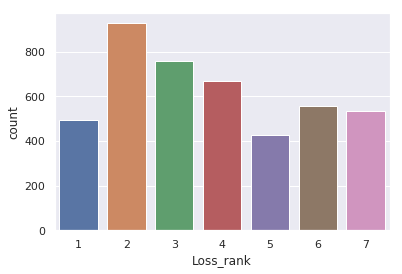

In [278]:
## ***Visualization***

sns.countplot(x='Loss_rank',data=df)

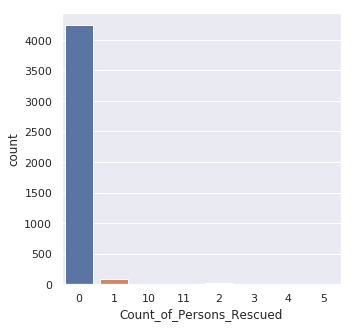

In [0]:
#Not Really Useful

f, ax = plt.subplots(1,1, figsize=(5,5))
sns.countplot(df["Count_of_Persons_Rescued"])

# **Algorithum**

In [0]:
#from sklearn.preprocessing import StandardScaler
# Define Scaling technique
#scaler = StandardScaler()

# Train escaling object 
#X_train_escaler = scaler.fit(X_train)

# Apply scaling model to the data
#X_train_escaled = X_train_escaler.transform(X_train)
#X_train_escaled

In [0]:
#split dataset into 70/30 dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3053, 74), (1309, 74), (3053, 1), (1309, 1))

# LogisticRegression

In [0]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_train, y_train)


In [0]:
clf.score(X_test, y_test)

0.3689839572192513

# Stochastic Gradient Descent model

In [0]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X_train, y_train)   


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
clf.predict(X)

array([4., 4., 4., ..., 4., 7., 3.])

In [0]:
clf.coef_                                         


In [0]:
clf.intercept_       

array([  344.00790203,   499.83984209,   384.94068377,    76.33119087,
        -100.96235734,  -609.55094687, -1493.22795355])

In [0]:
clf.decision_function(X)  

array([[ -4910.35673632,  -5707.98951913,   -638.99955221, ...,
         -5110.61898487, -15839.69975776,  -3884.45211979],
       [ -1583.13282759,  -3612.62089374,   -325.70826469, ...,
         -3290.6358665 ,  -8613.38308054,  -6310.51399837],
       [ -4806.178459  ,  -7838.22142827,  -2109.82161419, ...,
         -3624.85850997, -19872.98352504,  -5839.30710144],
       ...,
       [  -877.38564146,  -1250.72242253,   -120.2562092 , ...,
         -2165.53783121,  -7972.11916482,  -6356.83887166],
       [ -7528.03689346,  -7687.39428176,   -219.45775732, ...,
         -9558.3061012 , -16327.25332544,   1531.82750144],
       [ -2265.1607915 ,  -1357.15636873,    591.67487825, ...,
         -3772.38509425,  -9109.67124377,  -9731.74101406]])

# Decision Tree

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [0]:
clf.predict(X_test)

array([7., 2., 6., ..., 4., 1., 6.])

[Text(211.1949542728034, 213.0912, 'X[63] <= 75.008\ngini = 0.847\nsamples = 3053\nvalue = [330, 664, 515, 472, 301, 389, 382]'),
 Text(131.7335151433959, 204.3936, 'X[6] <= 0.5\ngini = 0.804\nsamples = 2211\nvalue = [313, 639, 478, 395, 199, 157, 30]'),
 Text(75.44470506146804, 195.696, 'X[63] <= 39.258\ngini = 0.808\nsamples = 1075\nvalue = [37, 189, 260, 273, 154, 134, 28]'),
 Text(44.00779490054183, 186.9984, 'X[2] <= 0.5\ngini = 0.743\nsamples = 502\nvalue = [22, 143, 172, 113, 35, 16, 1]'),
 Text(31.531490783592993, 178.3008, 'X[64] <= 0.5\ngini = 0.723\nsamples = 418\nvalue = [20, 133, 150, 85, 22, 7, 1]'),
 Text(20.2815903177495, 169.60320000000002, 'X[59] <= 0.5\ngini = 0.71\nsamples = 305\nvalue = [19, 115, 102, 53, 13, 3, 0]'),
 Text(8.814051960375444, 160.9056, 'X[32] <= 0.5\ngini = 0.69\nsamples = 195\nvalue = [18, 88, 54, 28, 6, 1, 0]'),
 Text(4.260049741751498, 152.208, 'X[57] <= 0.5\ngini = 0.761\nsamples = 67\nvalue = [14, 23, 13, 13, 3, 1, 0]'),
 Text(1.86320646879152

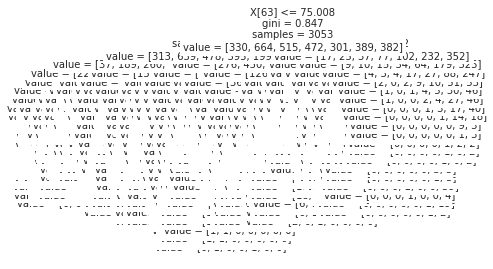

In [276]:
from sklearn import tree
tree.plot_tree(clf.fit(X_train, y_train),fontsize=10)



# Decision Trees

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

# Random Forest



In [0]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.413292589763178


In [0]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_rf))

0.4025974025974026


In [0]:
rnd_clf.feature_importances_


array([1.50437243e-03, 7.94898215e-04, 9.24981934e-02, 1.07499705e-01,
       1.20170326e-01, 2.35504152e-03, 1.13691785e-01, 5.78180877e-02,
       1.51929749e-02, 1.67437413e-02, 1.25795638e-04, 9.09079713e-05,
       7.38010763e-03, 1.58658804e-04, 1.84636379e-03, 1.03082819e-04,
       2.54286122e-04, 8.58619234e-04, 1.06631178e-03, 8.81486942e-04,
       3.35491808e-05, 1.23601545e-03, 1.84167593e-03, 2.48886047e-02,
       7.12910463e-04, 2.33112586e-02, 7.77109235e-04, 1.25084111e-03,
       2.40561174e-03, 1.89454496e-03, 8.16786155e-05, 8.99453478e-05,
       1.15793380e-02, 2.28879068e-04, 9.24059065e-04, 1.16390526e-03,
       5.80000855e-04, 0.00000000e+00, 4.87781390e-05, 0.00000000e+00,
       2.32537028e-04, 1.41114044e-03, 5.11220498e-03, 1.71759234e-02,
       3.58106181e-04, 5.15369382e-04, 2.42201499e-04, 0.00000000e+00,
       2.39711165e-04, 2.73029175e-05, 9.27874693e-03, 2.74814140e-04,
       2.06454956e-05, 0.00000000e+00, 3.99197483e-04, 3.87607072e-03,
      

In [0]:
RF = RandomForestClassifier(random_state=42)

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [4, 5, 10, 20, 50]}]

grid_search_RF = GridSearchCV (RF, param_grid, cv=5)
grid_search_RF.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{

In [0]:
grid_search_RF.best_params_

{'n_estimators': 50}

In [0]:
cvres_RF = grid_search_RF.cv_results_

for mean_score, params in zip(cvres_RF["mean_test_score"], cvres_RF["params"]):
  print(mean_score, params)

0.3409760890926957 {'n_estimators': 4}
0.3599737962659679 {'n_estimators': 5}
0.3812643301670488 {'n_estimators': 10}
0.38978054372748117 {'n_estimators': 20}
0.40386505076973467 {'n_estimators': 50}


In [0]:
selected_model = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=0)
selected_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
selected_model.score(X_test,y_test)

0.3177998472116119

In [0]:
selected_model.predict(X_test)


array([2., 2., 7., ..., 2., 2., 7.])

In [0]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1],[0,1],'k--')
  plt.axis([0,1,0,1])
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate', fontsize=16)

In [0]:
best_RF_model = grid_search_RF.best_estimator_

y_probas_RF = cross_val_predict(best_RF_model, X_train, y_train, cv=5, method="predict_proba")
y_scores_RF = y_probas_RF[:, 1]
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_train,y_scores)

plt.figure(figsize=(8,6))
plot_roc_curve(fpr_RF, tpr_RF, 



# SVM LinearSVR

In [277]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X_train, y_train)

svm_reg.score(X_test, y_test)

0.3328592116080922